In [58]:
import graphviz
import localutils as lu
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Synthetic V3

In [59]:
X, y, feature_names = lu.load_hugin_dataset('synthetic_v3_1000.dat', 'Class')

## Mutual info

In [60]:
mis = mutual_info_classif(X, y, discrete_features=True)
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

F1:	0.2113
F2:	0.0874
F3:	0.0002
F4:	0.1714


In [61]:
fis = mis / mis.sum()
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

F1:	0.4492
F2:	0.1859
F3:	0.0004
F4:	0.3645


## Decision Tree

In [62]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

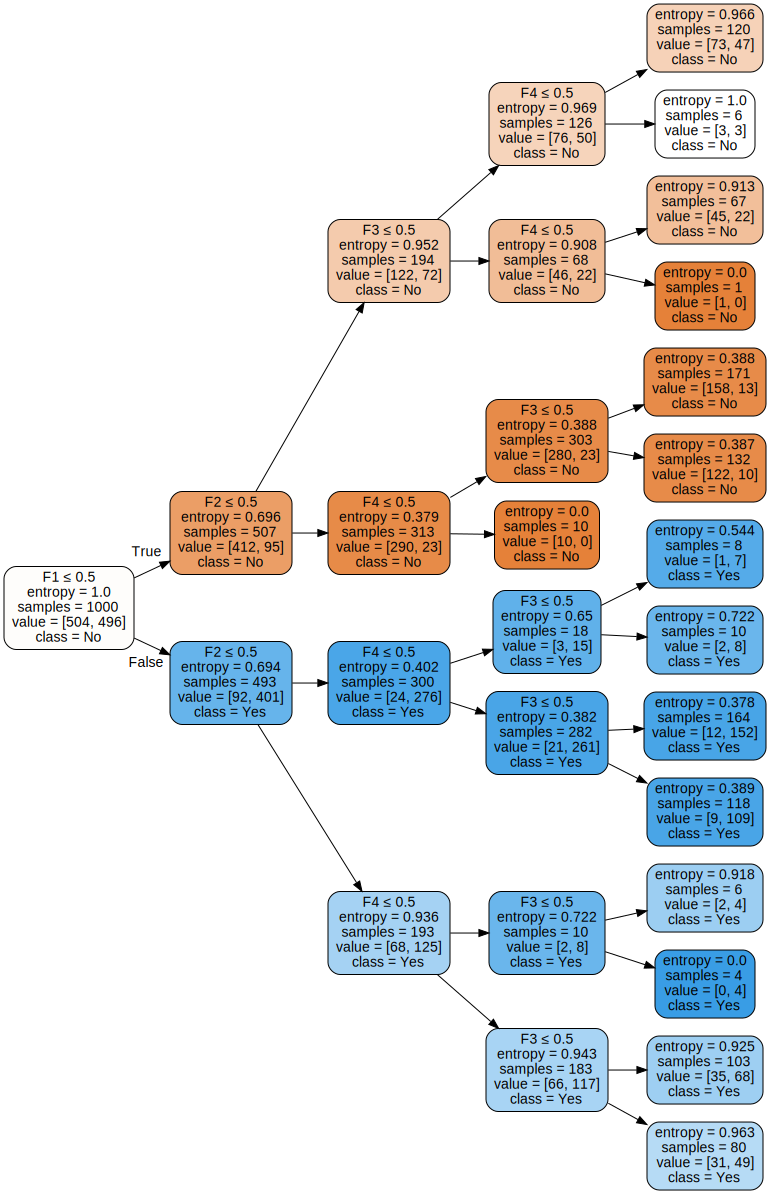

In [63]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names, class_names=clf.classes_,
                                max_depth=None, 
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [64]:
fis = clf.feature_importances_
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

F1:	0.7578
F2:	0.2254
F3:	0.0072
F4:	0.0096


What can you say about 'global' importances of these features versus their importance in this particular tree?

# Iris Dataset

In [66]:
from sklearn.datasets import load_iris

In [67]:
iris=load_iris()

In [68]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [69]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

## Mutual Info

In [70]:
mis = mutual_info_classif(X, y, discrete_features=False)

In [71]:
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

petal length (cm):	0.9906
petal width (cm):	0.9887
sepal length (cm):	0.4856
sepal width (cm):	0.2858


In [72]:
fis = mis / mis.sum()
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

petal length (cm):	0.3601
petal width (cm):	0.3594
sepal length (cm):	0.1765
sepal width (cm):	0.1039


## Decision Tree

In [73]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

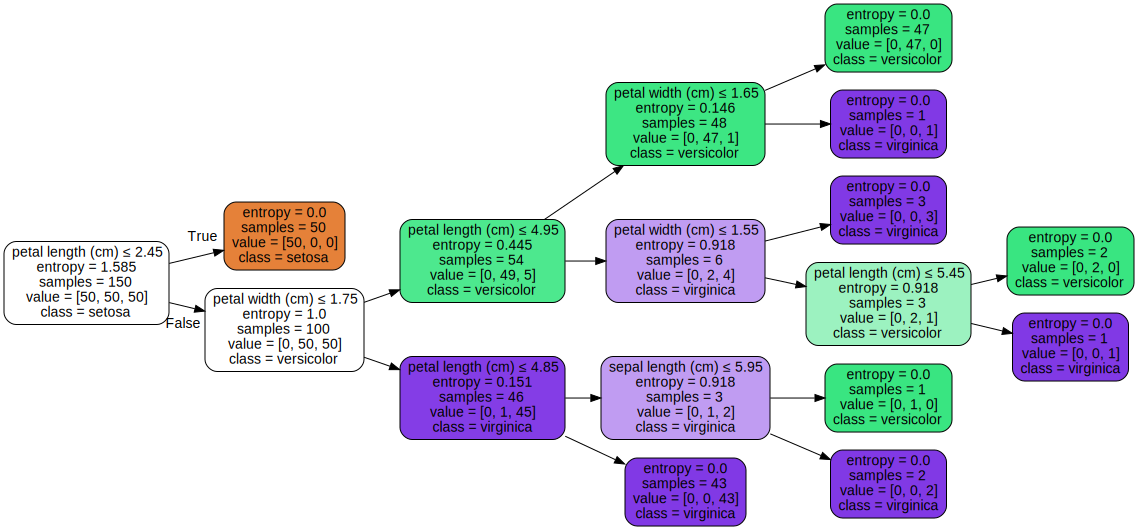

In [74]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names, class_names=iris.target_names,
                                max_depth=None,
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [76]:
fis = clf.feature_importances_
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

petal length (cm):	0.6570
petal width (cm):	0.3314
sepal length (cm):	0.0116
sepal width (cm):	0.0000


# Breast-cancer Dataset

In [77]:
from sklearn.datasets import load_breast_cancer

In [78]:
breast_cancer = load_breast_cancer()

In [79]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [80]:
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

In [81]:
mis = mutual_info_classif(X, y, discrete_features=False)
for i in np.argsort(feature_names):
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

area error:	0.3399
compactness error:	0.0730
concave points error:	0.1275
concavity error:	0.1165
fractal dimension error:	0.0376
mean area:	0.3609
mean compactness:	0.2101
mean concave points:	0.4384
mean concavity:	0.3723
mean fractal dimension:	0.0083
mean perimeter:	0.4037
mean radius:	0.3648
mean smoothness:	0.0780
mean symmetry:	0.0672
mean texture:	0.0949
perimeter error:	0.2754
radius error:	0.2460
smoothness error:	0.0165
symmetry error:	0.0149
texture error:	0.0005
worst area:	0.4633
worst compactness:	0.2253
worst concave points:	0.4371
worst concavity:	0.3152
worst fractal dimension:	0.0674
worst perimeter:	0.4780
worst radius:	0.4544
worst smoothness:	0.1059
worst symmetry:	0.0917
worst texture:	0.1220


In [82]:
for i in np.argsort(mis)[-10:]:
    print("%s:\t%0.4f" %(feature_names[i], mis[i]))

area error:	0.3399
mean area:	0.3609
mean radius:	0.3648
mean concavity:	0.3723
mean perimeter:	0.4037
worst concave points:	0.4371
mean concave points:	0.4384
worst radius:	0.4544
worst area:	0.4633
worst perimeter:	0.4780


In [83]:
fis = mis / mis.sum()
for i in np.argsort(fis)[-10:]:
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

area error:	0.0531
mean area:	0.0563
mean radius:	0.0569
mean concavity:	0.0581
mean perimeter:	0.0630
worst concave points:	0.0682
mean concave points:	0.0684
worst radius:	0.0709
worst area:	0.0723
worst perimeter:	0.0746


## Decision Tree

In [84]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

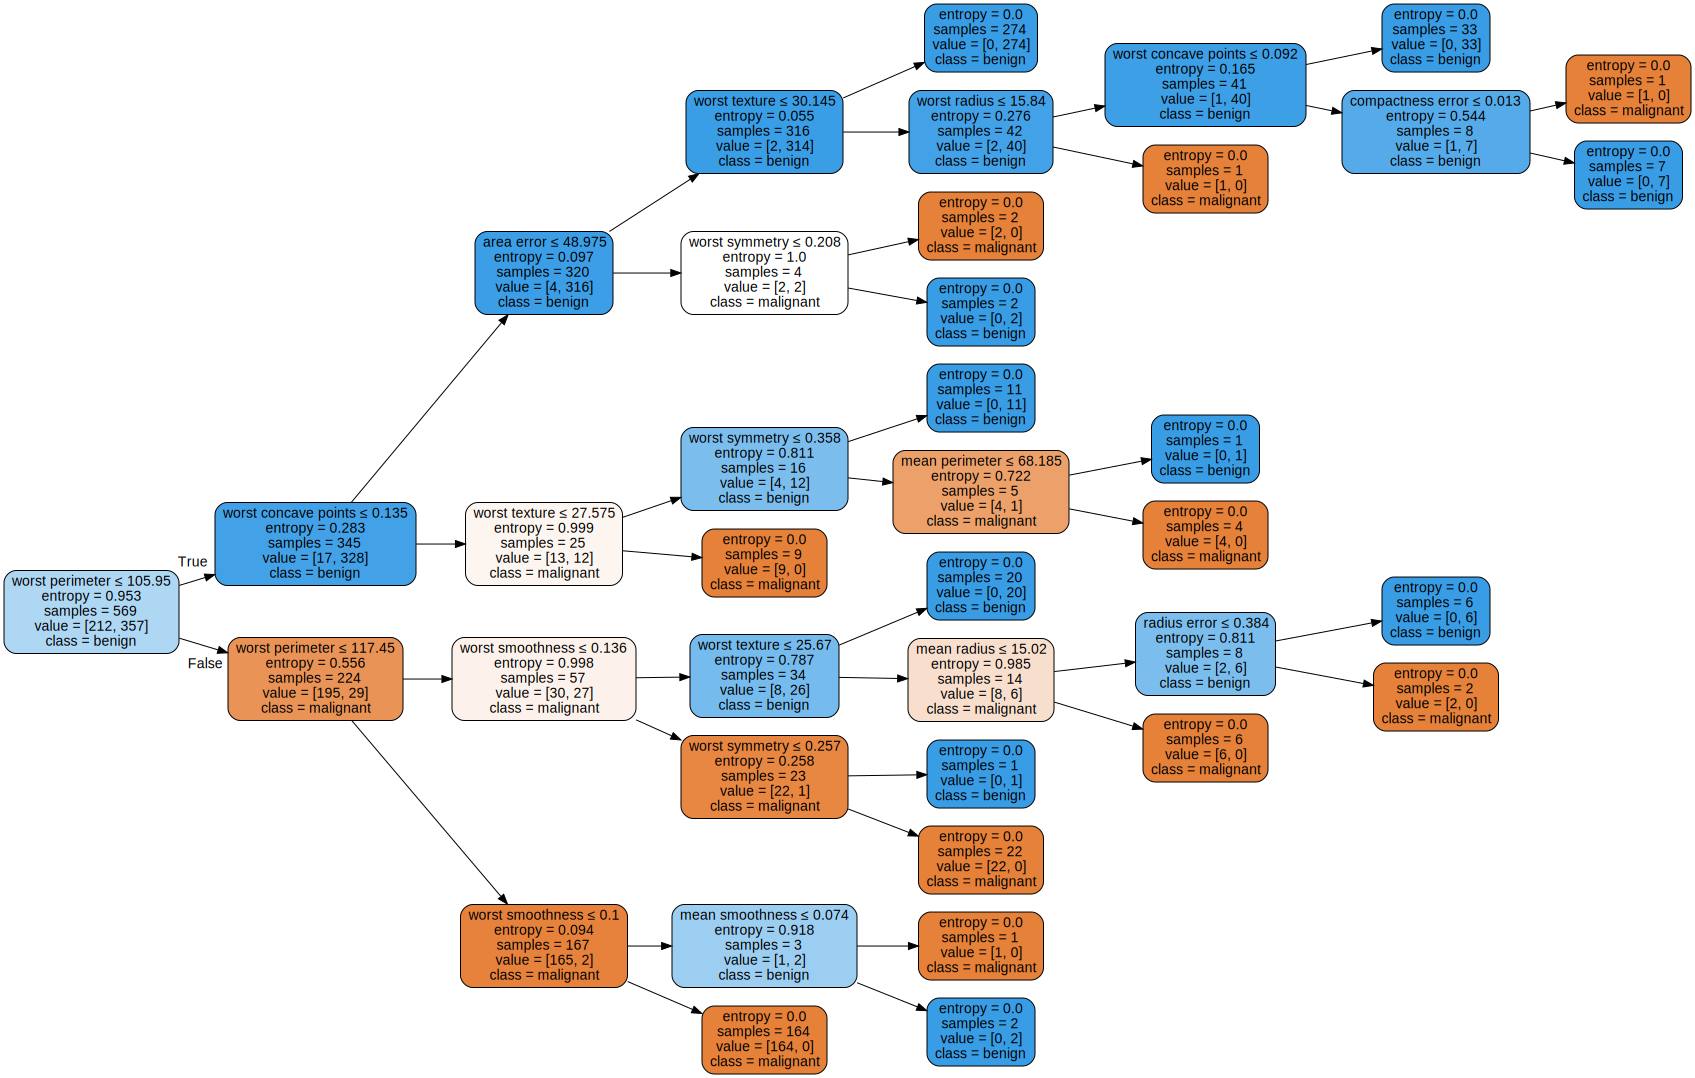

In [85]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names, class_names=breast_cancer.target_names,
                                max_depth=None,
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [86]:
fis = clf.feature_importances_
for i in np.argsort(fis)[-10:]:
    print("%s:\t%0.4f" %(feature_names[i], fis[i]))

compactness error:	0.0080
worst radius:	0.0089
radius error:	0.0120
mean radius:	0.0135
area error:	0.0176
worst symmetry:	0.0356
worst texture:	0.0569
worst smoothness:	0.0684
worst concave points:	0.0815
worst perimeter:	0.6859


# Categorical Features?

In [87]:
X = np.asarray([['R'], ['G'], ['B']])
y = np.asarray([0, 1, 0])

In [88]:
clf.fit(X, y)

ValueError: could not convert string to float: 'R'

In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
ohe = OneHotEncoder()
ohe.fit(X)
ohe.categories_

[array(['B', 'G', 'R'], dtype='<U1')]

In [91]:
ohe.transform(X).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [92]:
Xt = ohe.transform(X)

In [93]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
clf.fit(Xt, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

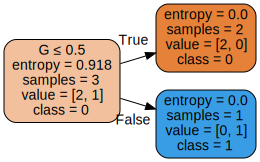

In [94]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=ohe.categories_[0], class_names=['0', '1'],
                                max_depth=None,
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph

In [95]:
X = np.asarray([['R'], ['G'], ['B']])
y = np.asarray(['c1', 'c2', 'c3'])

In [96]:
ohe = OneHotEncoder()
ohe.fit(X)
ohe.categories_

[array(['B', 'G', 'R'], dtype='<U1')]

In [97]:
Xt = ohe.transform(X)

In [98]:
clf.fit(Xt, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

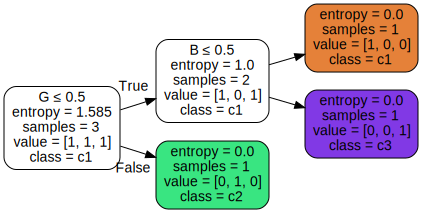

In [99]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=ohe.categories_[0], class_names=['c1', 'c2', 'c3'],
                                max_depth=None,
                                filled=True, rounded=True, rotate=True, special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render()
graph